In [1]:
from breastcancer_utils import *
import matplotlib.pyplot as plt
filename = 'wdbc_M1_B0.data'

In [46]:
X, y = load_breastcancer(filename)

In [47]:
n, m = X.shape

In [48]:
y.shape

(569,)

___
#### Question 2.2

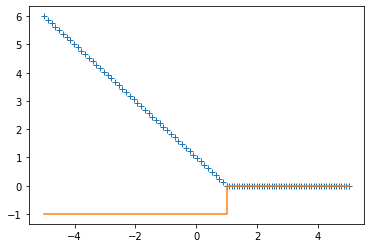

In [49]:
x1 = np.linspace(-5, 1, 50)
x2 = np.linspace(1, 5, 50)
x = np.hstack([x1, x2])
z = np.hstack([1-x1, x2*0])
dz = np.hstack([-1*np.ones(len(x1)), x2*0])
plt.plot(x,z,'+', x,dz)

___
#### Question 2.4

In [50]:
# M_{:,1} = (I_n y)X_{:,1}
ones = np.ones((n,1))
Xe = np.hstack((X, ones))
M = (Xe.T * y).T
M.shape

(569, 31)

In [51]:
def objective(v, a):
        """
            returns the objective function value for the specified inputs
            Note: c must be defined preliminary, 
                    along with X (the covariates matrix), 
                    and y the output vector of our data.
        """
        N = np.sum(v ** 2)/2
        Mva = np.ones(n) - y * (np.dot(X, v) + a)
        H = sum(Mva * (Mva>0)) 
        obj = N + c * H
        
        ones = np.ones((n,1))
        Xe = np.hstack((X, ones))
        M = (Xe.T * y).T
        dH = np.zeros(n)
        for i in range(n):
            if Mva[i] > 0:
                dH[i] = -1
        dN = np.hstack((v, 0)).T
        grad = dN + c * M.T.dot(dH)
        
        return obj, grad

In [52]:
V = np.ones(m)
a = 1; c = 1
objective(V, a)

(603.8252882581148,
 array([-38.73829648, -20.70475549, -34.49379607, -34.9876155 ,
         38.59618269,  45.35166232,  23.55585667,   1.95675574,
         36.5927392 ,  89.42902745,  -6.13062046,  28.6170554 ,
          0.18689247, -13.53182243,  59.92957203,  84.51089819,
         72.68924277,  60.05022852,  41.47511889,  99.88454603,
        -39.4982886 , -27.61455329, -34.31830559, -34.37001474,
         18.65124737,  28.15298039,  20.26382933,  -2.07793185,
         -2.28514378,  55.68259705,  26.        ]))

In [53]:
Va = np.hstack((V, a))
ans = np.dot(Xe, Va).shape

In [54]:
y.shape

(569,)

In [55]:
N = np.sum(V ** 2)/2
Xe = np.hstack((X, ones))
Va = np.hstack((V, a))
Mva = 1 - y * np.dot(Xe, Va)
M = (Xe.T * y).T
H = sum(Mva * (Mva>0))
f = N + c * H
f

603.8252882581148

In [56]:
sum(y * (np.dot(X, V) + a))

7514.467901815294

In [57]:
np.dot(Xe, Va).shape

(569,)

In [58]:
y.shape

(569,)

___
#### Question 2.5

In [59]:
def norm(vect):
    return np.sqrt(np.sum(np.square(vect)))

In [60]:
def gradient(V, a):
    Va0 = np.hstack((V, a))
    mod0 = np.inf 
    for k in range(0,10000):
        gamma = 1 / (k + 1)
        grad = objective(Va0[:-1], Va0[-1])[1]
        mod = norm(grad)
        #print(mod)
        Va  = Va0 - gamma * grad
        Va0 = Va
        
        mod0 = mod
    return Va[:-1], Va[-1]

---
Test with zeros:

In [61]:
V0 = np.zeros(m); a0 = 0
print(objective(V0, a0))
Vopt, aopt = gradient(V0, a0)
opt = objective(Vopt, aopt)[0]
opt
objective(Vopt, aopt)

(569.0, array([-401.67227502, -228.44097367, -408.60883936, -390.09318973,
       -197.28489321, -328.22148127, -383.14721063, -427.3041985 ,
       -181.84509798,    7.0634352 , -312.04525371,    4.56861423,
       -305.99668108, -301.64736575,   36.873181  , -161.21243374,
       -139.60579724, -224.51080955,    3.58836467,  -42.90155493,
       -427.21613038, -251.39455908, -430.77071337, -403.76117734,
       -231.89607933, -325.17580208, -362.92710448, -436.63153222,
       -229.05116772, -178.19917556,  145.        ]))


(26.58455025371073,
 array([ 2.03063272, -0.9611799 ,  1.61834199,  2.04766806, -4.84796227,
        -5.10335695, -3.57037182, -2.33589113, -5.12372002, -4.83122008,
         2.82118474, -1.33184844,  1.56231412,  1.99997122, -3.18614696,
        -6.10099066, -5.66910111, -3.80741963, -4.55455713, -3.22669201,
         1.84103496, -1.94109599,  1.20020529,  1.71995579, -4.02554551,
        -4.50742006, -4.52611778, -3.21616738, -4.1301077 , -3.61746869,
        -2.        ]))

---
Test with ones:

In [20]:
V0 = np.ones(m); a0 = 1
print(objective(V0, a0))
Vopt, aopt = gradient(V0, a0)
opt = objective(Vopt, aopt)[0]
objective(Vopt, aopt)

(603.8252882581148, array([-38.73829648, -20.70475549, -34.49379607, -34.9876155 ,
        38.59618269,  45.35166232,  23.55585667,   1.95675574,
        36.5927392 ,  89.42902745,  -6.13062046,  28.6170554 ,
         0.18689247, -13.53182243,  59.92957203,  84.51089819,
        72.68924277,  60.05022852,  41.47511889,  99.88454603,
       -39.4982886 , -27.61455329, -34.31830559, -34.37001474,
        18.65124737,  28.15298039,  20.26382933,  -2.07793185,
        -2.28514378,  55.68259705,  26.        ]))


(26.53689555318948,
 array([ 0.18195168,  0.94054712,  0.35516952, -0.15205002,  0.8244559 ,
         3.21611425,  0.86139221,  0.64485046,  2.52556414,  2.07984036,
        -1.63198288, -0.26969245, -1.07659087, -0.97133772,  0.63077604,
         5.18433793,  0.55072144, -0.215716  ,  3.33709558,  2.52509351,
         0.20728638,  1.40391121,  0.52276148, -0.15571956,  1.82368762,
         4.84113034,  1.8431172 ,  1.22342048,  5.83732042,  3.90970319,
         2.        ]))

___
Gradient function verification

In [21]:
def Gvec(Va):
    return objective(Va[:-1], Va[-1])[0]
def gradGvec(Va):
    return objective(Va[:-1], Va[-1])[1].ravel()

In [22]:
from scipy.optimize import check_grad
V0 = np.ones(m); a0 = 1
err = check_grad(Gvec, gradGvec, np.hstack((V0, a0)))
print("the gradient error for initializationvalues of 1 is:", err)
V0 = np.zeros(m); a0 = 0
err = check_grad(Gvec, gradGvec, np.hstack((V0, a0)))
print("the gradient error for initializationvalues of 0 is:", err)

the gradient error for initializationvalues of 1 is: 7.280418426132196e-05
the gradient error for initializationvalues of 0 is: 0.00014103374334746124


Hence, our gradient function representation is accurate.

___
#### Question 3.1

In [84]:
def objective(v, a, i):
        """
            returns the objective function value for the specified inputs
            Note: c must be defined preliminary, 
                    along with X (the covariates matrix), 
                    and y the output vector of our data.
        """
        N = np.sum(v ** 2)/2
        Mva = 1 - y[i] * (np.dot(X[i], v) + a)
        H = Mva * (Mva>0) 
        obj = N + c * H
        
        ones = np.ones(1)
        Xe = np.hstack((X[i], ones))
        M = y[i]*Xe
        dH = np.zeros(1)
        if Mva > 0:
                dH[0] = -1
        dN = np.hstack((v, 0)).T
        grad = dN + c * dH * M.T
        
        return obj, grad

In [91]:
def gradientStat(V, a):
    i = int(np.random.uniform(0,n))
    Va0 = np.hstack((V, a))
    mod0 = np.inf 
    for k in range(0,10000):
        gamma = 1 / (k + 1)
        grad = objective(Va0[:-1], Va0[-1], i)[1]
        mod = norm(grad)
        #print(mod)
        Va  = Va0 - gamma * grad
        Va0 = Va
        
        mod0 = mod
    return Va[:-1], Va[-1]

In [100]:
from scipy.stats import uniform
i = int(np.random.uniform(0,n))

V0 = np.ones(m); a0 = 1
print(objective(V0, a0, i))
Vopt, aopt = gradientStat(V0, a0)
opt = objective(Vopt, aopt, i)[0]
objective(Vopt, aopt, i)

(23.504602382334852, array([0.74799655, 1.19555543, 0.78996979, 0.6814915 , 0.03782321,
       1.34034992, 1.15317924, 0.46892394, 0.23104331, 1.21581465,
       0.55183697, 0.26817817, 1.24897108, 0.636376  , 0.29597849,
       3.29660519, 2.48995339, 1.30558077, 0.36042717, 2.64089068,
       0.82828928, 0.9711403 , 1.23050627, 0.7414407 , 0.46219525,
       2.97416391, 2.83942577, 1.32118645, 0.90979949, 3.26950952,
       1.        ]))


(1.578020018292065,
 array([-1.94361438e-01,  2.34281093e-01, -1.53670292e-01, -2.77202319e-01,
        -1.00389169e+00,  3.55775891e-01,  1.84841626e-01, -4.95240389e-01,
        -7.81231278e-01,  1.53885213e-01, -4.29602861e-01, -7.46823845e-01,
         2.67431206e-01, -3.44563566e-01, -7.33833456e-01,  2.31983977e+00,
         1.51998641e+00,  3.59922681e-01, -6.60368634e-01,  1.63761324e+00,
        -1.22666748e-01, -4.76490664e-04,  2.78597723e-01, -2.23842492e-01,
        -5.70212275e-01,  1.99838459e+00,  1.87651136e+00,  3.70746231e-01,
        -9.16360273e-02,  2.25396944e+00,  1.00000000e+00]))

___
#### Question 4.1

In [30]:
n

569